In [2]:
! pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"swapniladnak","key":"14d15ba2a250eab5e5f7e4086497fbda"}'}

In [4]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d ashishjangra27/face-mask-12k-images-dataset

 96% 317M/330M [00:03<00:00, 135MB/s]
100% 330M/330M [00:03<00:00, 106MB/s]


In [10]:
import os
import zipfile
local_zip = '/content/face-mask-12k-images-dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/face-mask-12k-images-dataset')
zip_ref.close()

In [11]:
train_dir=os.path.join('/content/face-mask-12k-images-dataset/Face Mask Dataset/Train')
test_dir=os.path.join('/content/face-mask-12k-images-dataset/Face Mask Dataset/Test')
valid_dir=os.path.join('/content/face-mask-12k-images-dataset/Face Mask Dataset/Validation')

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [26]:
train=ImageDataGenerator(rescale=(1/255))
test=ImageDataGenerator(rescale=(1/255))
valid=ImageDataGenerator(rescale=(1/255))

In [27]:
train=train.flow_from_directory(
    train_dir,
    target_size=(128,128),
    batch_size=128,
    class_mode='binary'
)
test=test.flow_from_directory(
    test_dir,
    target_size=(128,128),
    batch_size=128,
    class_mode='binary'
)
valid=valid.flow_from_directory(
    valid_dir,
    target_size=(128,128),
    batch_size=128,
    class_mode='binary'
)

Found 10000 images belonging to 2 classes.
Found 992 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [112]:
model=tf.keras.Sequential([
     tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(128,128,3)),
     tf.keras.layers.MaxPooling2D(3,3),

     tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
     tf.keras.layers.MaxPooling2D(3,3),

     tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
     tf.keras.layers.MaxPooling2D(3,3),

      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(256,activation='relu'),
      tf.keras.layers.Dense(1,activation='sigmoid')

])

In [113]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 126, 126, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 42, 42, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 40, 40, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 576)              

In [114]:
from tensorflow.keras.optimizers import RMSprop
model.compile(
    optimizer=RMSprop(lr=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [115]:
class mycallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epochs,logs={}):
    if(logs['accuracy']==1.00):
      print('\nModel reached to final destination')
      self.model.stop_training=True
callbacks=mycallback()

In [116]:
model.fit(
    train,
    epochs=10,
    validation_data=valid,
    callbacks=callbacks,
    verbose=1
)

Epoch 1/10
79/79 [==============================] - 17s 211ms/step - loss: 0.2984 - accuracy: 0.8765 - val_loss: 0.1476 - val_accuracy: 0.9600
Epoch 2/10
79/79 [==============================] - 17s 209ms/step - loss: 0.1176 - accuracy: 0.9593 - val_loss: 0.0605 - val_accuracy: 0.9850
Epoch 3/10
79/79 [==============================] - 17s 211ms/step - loss: 0.0810 - accuracy: 0.9739 - val_loss: 0.0507 - val_accuracy: 0.9812
Epoch 4/10
79/79 [==============================] - 16s 207ms/step - loss: 0.0516 - accuracy: 0.9839 - val_loss: 0.0316 - val_accuracy: 0.9875
Epoch 5/10
79/79 [==============================] - 16s 206ms/step - loss: 0.0443 - accuracy: 0.9848 - val_loss: 0.0248 - val_accuracy: 0.9887
Epoch 6/10
79/79 [==============================] - 16s 206ms/step - loss: 0.0367 - accuracy: 0.9873 - val_loss: 0.0595 - val_accuracy: 0.9762
Epoch 7/10
79/79 [==============================] - 16s 205ms/step - loss: 0.0289 - accuracy: 0.9898 - val_loss: 0.0129 - val_accuracy: 0.9950

In [117]:
model.evaluate(test)

8/8 [==============================] - 1s 157ms/step - loss: 0.0213 - accuracy: 0.9909


[0.02125687710940838, 0.9909273982048035]

Saving 1411.png to 1411 (1).png
[[1.]]


 Not weared mask


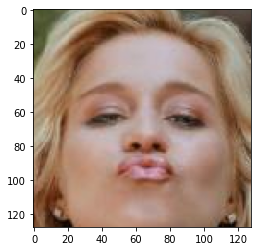

In [124]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
f=files.upload()
for i in f.keys():
  path= '/content/'+i
  x= image.load_img(path,target_size=(128,128))
  img=image.img_to_array(x)
  img = np.expand_dims(img, axis=0)
  images = np.vstack([img])
  classes = model.predict(images, batch_size=10).round()
  print(classes)
  if classes==1:
    plt.imshow(x)
    print('\n')
    print("\033[1m"+" Not weared mask")
  else:
    plt.imshow(x)
    print('\n')
    print('\033[1m'+" Weared mask")
 

Saving Augmented_349_6184398.png to Augmented_349_6184398.png
[[0.]]


 Weared mask


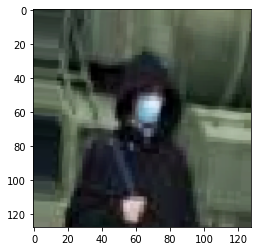

In [122]:

f=files.upload()
for i in f.keys():
  path= '/content/'+i
  x= image.load_img(path,target_size=(128,128))
  img=image.img_to_array(x)
  img = np.expand_dims(img, axis=0)
  images = np.vstack([img])
  classes = model.predict(images, batch_size=10).round()
  print(classes)
  if classes==1:
    plt.imshow(x)
    print('\n')
    print("\033[1m"+" Not weared mask")
  else:
    plt.imshow(x)
    print('\n')
    print('\033[1m'+" Weared mask")
 